In [84]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from matplotlib import style
style.use('seaborn-white')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [85]:
# Loading simulated results for comparsion with SINDy
df_IDM = pd.read_csv('../Data/allResults/classicalCFM/NAPOLI2/Exp/Model_1/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(S).csv', header=None,low_memory=False, encoding='UTF-8')
df_IDM = df_IDM.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_IDM = pd.DataFrame(df_IDM)

df_GIPPS = pd.read_csv('../Data/allResults/classicalCFM/NAPOLI2/Exp/Model_2/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(S).csv', header=None,low_memory=False, encoding='UTF-8')
df_GIPPS = df_GIPPS.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_GIPPS = pd.DataFrame(df_GIPPS)

df_FVDM_CTH = pd.read_csv('../Data/allResults/classicalCFM/NAPOLI2/Exp/Model_3/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(S).csv', header=None,low_memory=False, encoding='UTF-8')
df_FVDM_CTH = df_FVDM_CTH.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_FVDM_CTH = pd.DataFrame(df_FVDM_CTH)

df_FVDM_SIG = pd.read_csv('../Data/allResults/classicalCFM/NAPOLI2/Exp/Model_4/VehicleID_1/simData/Simulation_CalExp_1_ValExp_1_RMSE(S).csv', header=None,low_memory=False, encoding='UTF-8')
df_FVDM_SIG = df_FVDM_SIG.rename(columns={0:"FOLLOW_VEL",1:"FOLLOW_PRED_V",2:"SPACING_REAL",3:"SPACING_PRED",4:"FOLLOW_ACC",5:"FOLLOW_PRED_A"})
df_FVDM_SIG = pd.DataFrame(df_FVDM_SIG)

In [86]:
df = pd.read_csv('../Data/NAPOLI/dataVehicle1.csv', header=None,low_memory=False, encoding='UTF-8')
df = df.rename(columns={0:"TIME",1:"LEAD_POS",2:"FOLLOW_POS",3:"LEAD_VEL",4:"FOLLOW_VEL",5:"LEAD_LENGTH"})
df = pd.DataFrame(df)
print(df)

      TIME    LEAD_POS  FOLLOW_POS  LEAD_VEL  FOLLOW_VEL  LEAD_LENGTH
0        1     9.45102     2.38000   4.39751     4.21765         3.73
1        2     9.89652     2.80989   4.51239     4.38015         3.73
2        3    10.35270     3.25411   4.61132     4.50423         3.73
3        4    10.81753     3.70859   4.68523     4.58534         3.73
4        5    11.28818     4.16912   4.72783     4.62536         3.73
...    ...         ...         ...       ...         ...          ...
1884  1885  1370.01124  1351.63571  14.01855    14.21913         3.73
1885  1886  1371.41119  1353.05787  13.98043    14.22416         3.73
1886  1887  1372.80736  1354.48035  13.94293    14.22541         3.73
1887  1888  1374.19992  1355.90270  13.90839    14.22166         3.73
1888  1889  1375.58930  1357.32449  13.87907    14.21401         3.73

[1889 rows x 6 columns]


In [87]:
# Converting Simulated Dataframes to NumPy Arrays 
followRealV_IDM = np.asarray(df_IDM['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_IDM = np.asarray(df_IDM['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_IDM = np.asarray(df_IDM['SPACING_REAL']) # Spacing Real
spacePred_IDM = np.asarray(df_IDM['SPACING_PRED']) # Spacing Pred
followRealA_IDM = np.asarray(df_IDM["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_IDM = np.asarray(df_IDM["FOLLOW_PRED_A"]) # Follow Pred Acc

followRealV_GIPPS = np.asarray(df_GIPPS['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_GIPPS = np.asarray(df_GIPPS['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_GIPPS = np.asarray(df_GIPPS['SPACING_REAL']) # Spacing Real
spacePred_GIPPS = np.asarray(df_GIPPS['SPACING_PRED']) # Spacing Pred
followRealA_GIPPS = np.asarray(df_GIPPS["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_GIPPS = np.asarray(df_GIPPS["FOLLOW_PRED_A"]) # Follow Pred Acc

followRealV_CTH = np.asarray(df_FVDM_CTH['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_CTH = np.asarray(df_FVDM_CTH['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_CTH = np.asarray(df_FVDM_CTH['SPACING_REAL']) # Spacing Real
spacePred_CTH = np.asarray(df_FVDM_CTH['SPACING_PRED']) # Spacing Pred
followRealA_CTH = np.asarray(df_FVDM_CTH["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_CTH = np.asarray(df_FVDM_CTH["FOLLOW_PRED_A"]) # Follow Pred Acc

followRealV_SIG = np.asarray(df_FVDM_SIG['FOLLOW_VEL']) # Follow Real Velocity  
followPredV_SIG = np.asarray(df_FVDM_SIG['FOLLOW_PRED_V']) # Follow Pred Velocity 
spaceReal_SIG = np.asarray(df_FVDM_SIG['SPACING_REAL']) # Spacing Real
spacePred_SIG = np.asarray(df_FVDM_SIG['SPACING_PRED']) # Spacing Pred
followRealA_SIG = np.asarray(df_FVDM_SIG["FOLLOW_ACC"]) # Follow Real Acc 
followPredA_SIG = np.asarray(df_FVDM_SIG["FOLLOW_PRED_A"]) # Follow Pred Acc

In [88]:
startTrj = 0
endTrj = int(0.8*followRealV_IDM.shape[0])

print("Acc. RMSE IDM is", np.sqrt(mean_squared_error(followPredA_IDM[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE IDM is", np.sqrt(mean_squared_error(followPredV_IDM[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE IDM is", np.sqrt(mean_squared_error(spacePred_IDM[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredA_GIPPS[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredV_GIPPS[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE GIPPS is", np.sqrt(mean_squared_error(spacePred_GIPPS[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredA_CTH[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredV_CTH[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(spacePred_CTH[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredA_SIG[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredV_SIG[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(spacePred_SIG[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

Acc. RMSE IDM is 0.49550813510193487
Vel. RMSE IDM is 0.39724505837745866
Head. RMSE IDM is 1.0668418136122868
Acc. RMSE GIPPS is 0.5194149701311788
Vel. RMSE GIPPS is 0.4410530554007042
Head. RMSE GIPPS is 1.0544641875077427
Acc. RMSE FVDM-CTH is 0.4945403417248023
Vel. RMSE FVDM-CTH is 0.4264870865323793
Head. RMSE FVDM-CTH is 0.9647221969704693
Acc. RMSE FVDM-SIG is 0.4942557351270382
Vel. RMSE FVDM-SIG is 0.4258455687364263
Head. RMSE FVDM-SIG is 0.9624576257932442


In [89]:
tNew = np.asarray(df["TIME"])
startTrj = int(0.8*followRealV_IDM.shape[0])
endTrj = -1

print("Acc. RMSE IDM is", np.sqrt(mean_squared_error(followPredA_IDM[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE IDM is", np.sqrt(mean_squared_error(followPredV_IDM[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE IDM is", np.sqrt(mean_squared_error(spacePred_IDM[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredA_GIPPS[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE GIPPS is", np.sqrt(mean_squared_error(followPredV_GIPPS[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE GIPPS is", np.sqrt(mean_squared_error(spacePred_GIPPS[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredA_CTH[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(followPredV_CTH[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-CTH is", np.sqrt(mean_squared_error(spacePred_CTH[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

print("Acc. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredA_SIG[startTrj:endTrj], followRealA_IDM[startTrj:endTrj])))
print("Vel. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(followPredV_SIG[startTrj:endTrj], followRealV_IDM[startTrj:endTrj])))
print("Head. RMSE FVDM-SIG is", np.sqrt(mean_squared_error(spacePred_SIG[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj])))

Acc. RMSE IDM is 0.4766796640723413
Vel. RMSE IDM is 0.42203814975255327
Head. RMSE IDM is 1.6300775256400644
Acc. RMSE GIPPS is 0.6123399366588768
Vel. RMSE GIPPS is 0.6874064202069485
Head. RMSE GIPPS is 2.4482374869733357
Acc. RMSE FVDM-CTH is 0.46655830413829913
Vel. RMSE FVDM-CTH is 0.4008041632695857
Head. RMSE FVDM-CTH is 1.8377300487071881
Acc. RMSE FVDM-SIG is 0.4669889263155087
Vel. RMSE FVDM-SIG is 0.4048178262521939
Head. RMSE FVDM-SIG is 1.9211552800369558


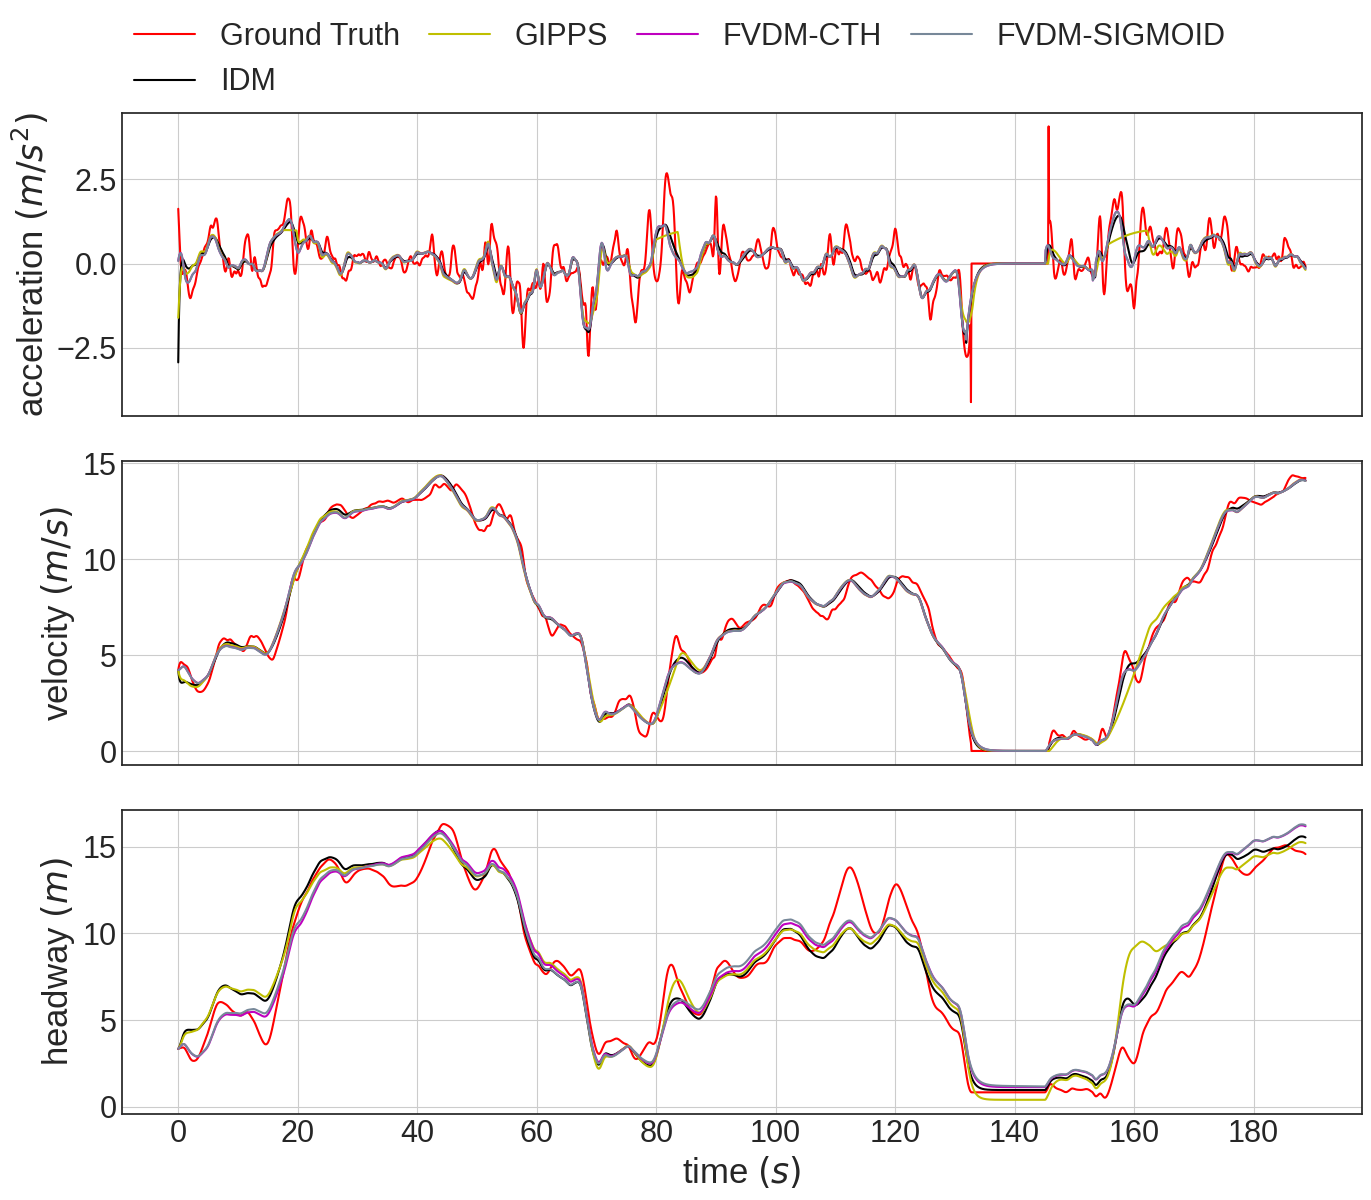

In [90]:
tNew = np.linspace(0, 188.9, 1889, endpoint=False) # 288.4 for JIANG # 188.8 for NAPOLI
# Uncomment above tNew while plotting ASTAZERO

startTrj = 0
endTrj = -1

fig = plt.figure() 

gs = fig.add_gridspec(3, hspace=0.15)
ax = gs.subplots(sharex=True)

fig.set_figheight(13)
fig.set_figwidth(16)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

g1, = ax[0].plot(tNew[startTrj:endTrj], followRealA_IDM[startTrj:endTrj], "r")
p1, = ax[0].plot(tNew[startTrj:endTrj], followPredA_IDM[startTrj:endTrj], "k")
h1, = ax[0].plot(tNew[startTrj:endTrj], followPredA_GIPPS[startTrj:endTrj], "y")
y1, = ax[0].plot(tNew[startTrj:endTrj], followPredA_CTH[startTrj:endTrj], "m")
r1, = ax[0].plot(tNew[startTrj:endTrj], followPredA_SIG[startTrj:endTrj], "lightslategray")
ax[0].set_ylabel('acceleration $(m/s^2)$')
ax[0].grid(True)
ax[0].xaxis.set_ticks(np.arange(min(tNew), max(tNew), 20))

ax[1].plot(tNew[startTrj:endTrj], followRealV_IDM[startTrj:endTrj], "r")
ax[1].plot(tNew[startTrj:endTrj], followPredV_IDM[startTrj:endTrj], "k")
ax[1].plot(tNew[startTrj:endTrj], followPredV_GIPPS[startTrj:endTrj], "y")
ax[1].plot(tNew[startTrj:endTrj], followPredV_CTH[startTrj:endTrj], "m")
ax[1].plot(tNew[startTrj:endTrj], followPredV_SIG[startTrj:endTrj], "lightslategray")
ax[1].set_ylabel('velocity $(m/s)$')
ax[1].grid(True)

ax[2].plot(tNew[startTrj:endTrj], spaceReal_IDM[startTrj:endTrj], "r")
ax[2].plot(tNew[startTrj:endTrj], spacePred_IDM[startTrj:endTrj], "k")
ax[2].plot(tNew[startTrj:endTrj], spacePred_GIPPS[startTrj:endTrj], "y")
ax[2].plot(tNew[startTrj:endTrj], spacePred_CTH[startTrj:endTrj], "m")
ax[2].plot(tNew[startTrj:endTrj], spacePred_SIG[startTrj:endTrj], "lightslategray")
ax[2].set_ylabel('headway $(m)$')
ax[2].grid(True)
ax[2].set_xlabel('time $(s)$')

ax[0].legend((g1, p1, h1 ,y1 ,r1), ('Ground Truth', 'IDM','GIPPS' ,'FVDM-CTH' ,'FVDM-SIGMOID'), bbox_to_anchor=(0,1.01,0.9,0.2), mode='expand', loc='lower left', ncol=4, borderaxespad=0, shadow=False)

plt.savefig('../Results/comparisonCFM/NAPOLI/NAPOLI_RMSE(S).png')
plt.show()